In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# 1. Membaca dataset
df_original = pd.read_excel(r"C:\Users\OPTION\Downloads\Python DA\[BELUM] Projects 8_Descriptive Analytics & Correlations Of European Countries, IQ Scors, PISA, GDP, Stunting, & Per Capita Income 2023 By Alfin Bahru\Negara Eropa, IQ, Pisa, GDP, Stunting, & Pendapatan Perkapita (2023).xlsx")
df

,NamaNegara,SkorIQ,SkorPISA,PendapatanperKapitaUSD,GDPMiliarUSD,PersentaseStunting
0,Andorra,102,460,46000,3.2,4.0
1,Armenia,95,410,5000,13.0,9.0
2,Austria,101,490,54000,516.5,5.0
3,Belarus,95,460,6600,72.6,5.5
4,Belgium,99,470,49000,642.3,4.5
5,Bosnia & Herzegovina,93,390,10500,20.6,9.0
6,Bulgaria,95,420,11800,80.4,8.0
7,Croatia,97,430,14200,62.6,6.5
8,Cyprus,98,450,29000,30.1,5.0
9,Czech Republic,98,460,19000,314.3,4.0


In [27]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (34, 6)


In [28]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NamaNegara              34 non-null     object 
 1   SkorIQ                  34 non-null     int64  
 2   SkorPISA                34 non-null     int64  
 3   PendapatanperKapitaUSD  34 non-null     int64  
 4   GDPMiliarUSD            34 non-null     float64
 5   PersentaseStunting      34 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.7+ KB


,SkorIQ,SkorPISA,PendapatanperKapitaUSD,GDPMiliarUSD,PersentaseStunting
count,34.000000,34.000000,34.000000,34.000000,34.000000
mean,98.176471,451.470588,33629.411765,244.867647,5.544118
std,3.406505,39.168041,26046.119113,286.854777,1.955442
min,92.000000,370.000000,4500.000000,2.000000,3.000000
25%,95.250000,430.000000,12400.000000,31.100000,4.000000
50%,98.000000,455.000000,22500.000000,76.700000,5.000000
75%,101.000000,477.500000,54750.000000,377.450000,6.375000
max,104.000000,510.000000,85000.000000,1018.100000,10.000000


In [29]:
# --- Ubah nama kolom: hilangkan spasi dan tanda kurung ---
df_original.columns = df_original.columns.str.replace(' ', '').str.replace('[()]', '', regex=True)
# Misal, "Pendapatan per Kapita (USD)" menjadi "PendapatanperKapitaUSD"
# Jika perlu, ubah nama kolom tertentu agar lebih rapi:
df_original.rename(columns={'PersentaseStunting%':'PersentaseStunting'}, inplace=True)

In [30]:
# --- Deteksi data duplikat dan missing values ---
jumlah_duplikat = df_original.duplicated().sum()
print("Jumlah duplikat:", jumlah_duplikat)

missing_values = df_original.isnull().sum()
print("Missing values per kolom:\n", missing_values)

Jumlah duplikat: 0
Missing values per kolom:
 NamaNegara                0
SkorIQ                    0
SkorPISA                  0
PendapatanperKapitaUSD    0
GDPMiliarUSD              0
PersentaseStunting        0
dtype: int64


In [31]:
# --- Deteksi outlier menggunakan IQR untuk kolom numerik ---
num_cols = df_original.select_dtypes(include=[np.number]).columns
mask = np.ones(len(df_original), dtype=bool)
for col in num_cols:
    Q1 = df_original[col].quantile(0.25)
    Q3 = df_original[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = mask & ((df_original[col] >= lower_bound) & (df_original[col] <= upper_bound))

# --- Data Cleaning: Hapus duplikat, missing values, dan outlier ---
df_cleaned = df_original[mask].drop_duplicates().dropna()

print("Bentuk data sebelum cleaning:", df_original.shape)
print("Bentuk data setelah cleaning:", df_cleaned.shape)

Bentuk data sebelum cleaning: (47, 6)
Bentuk data setelah cleaning: (34, 6)


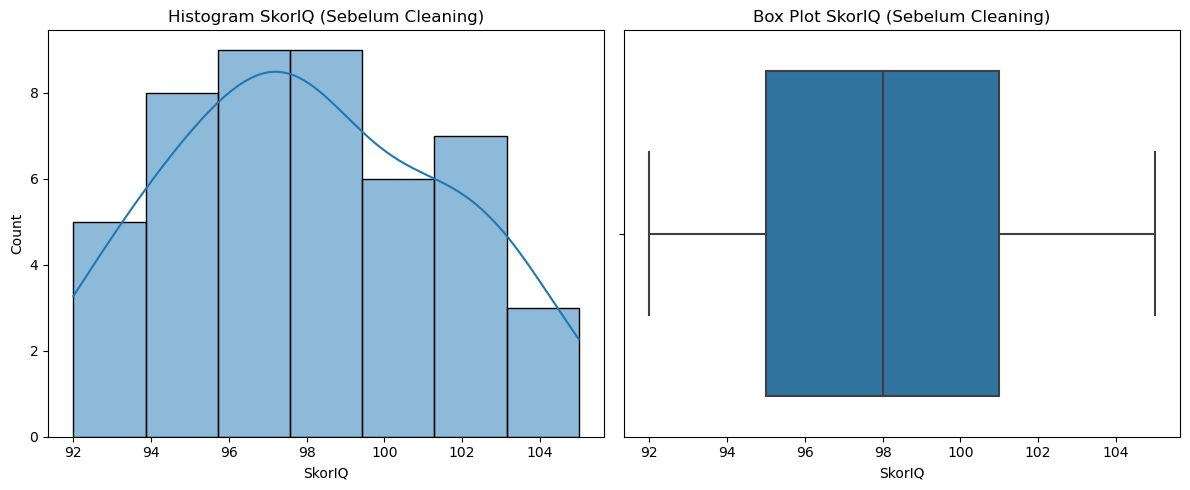

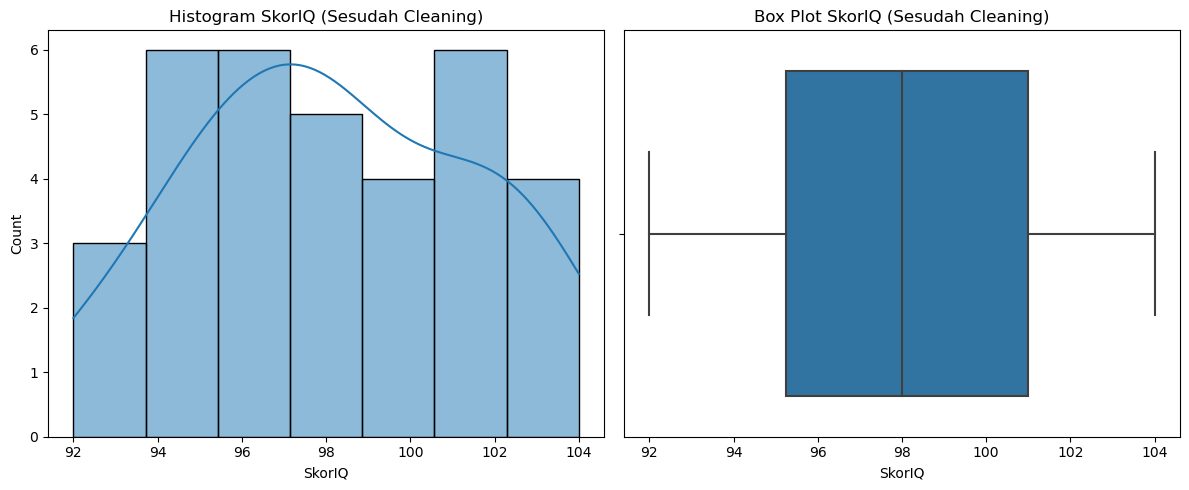

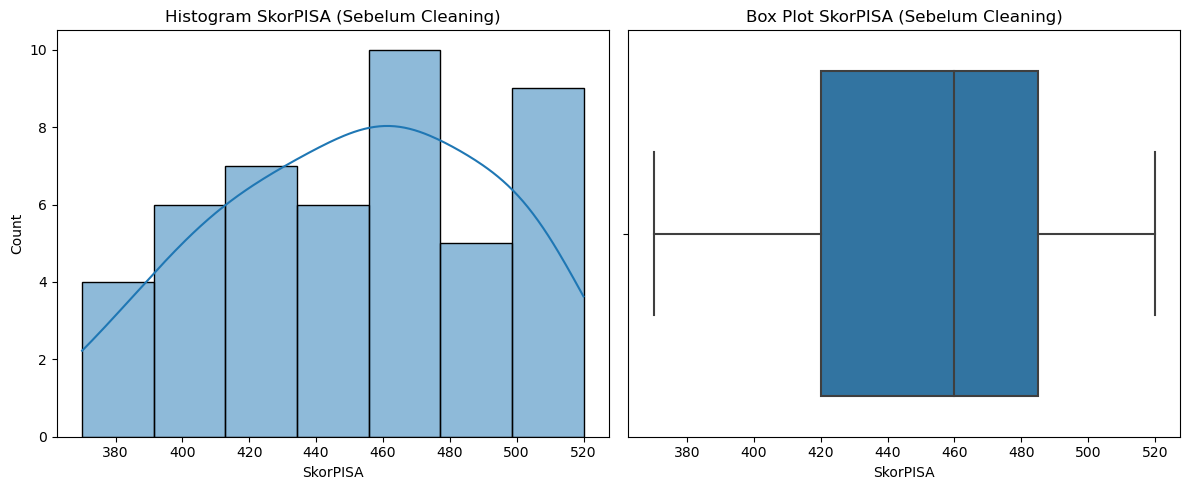

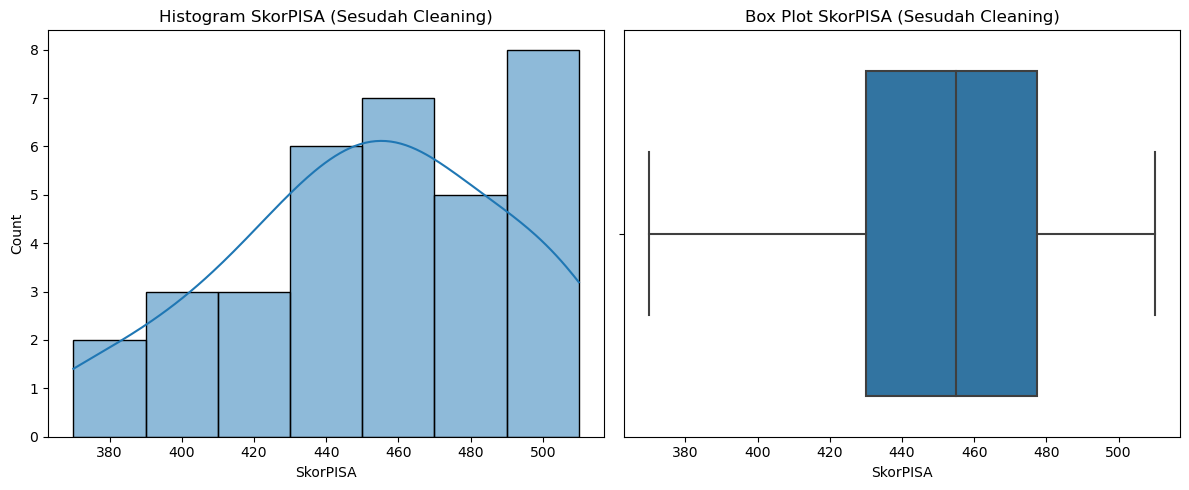

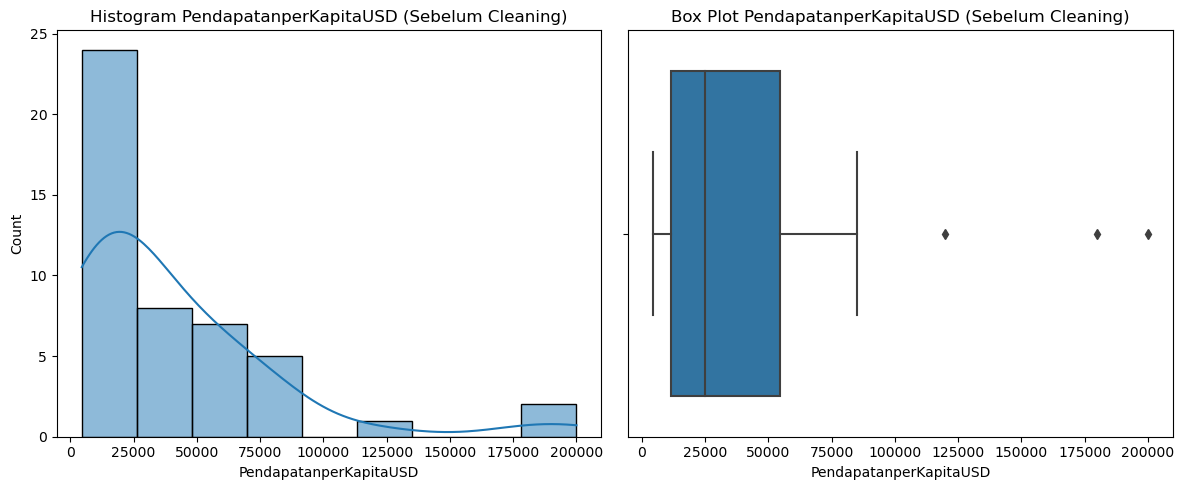

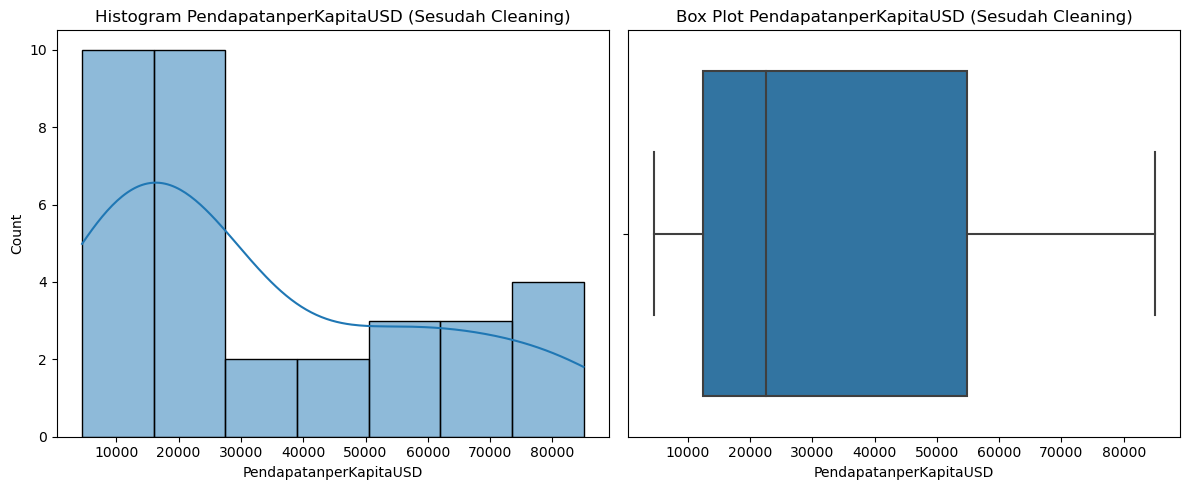

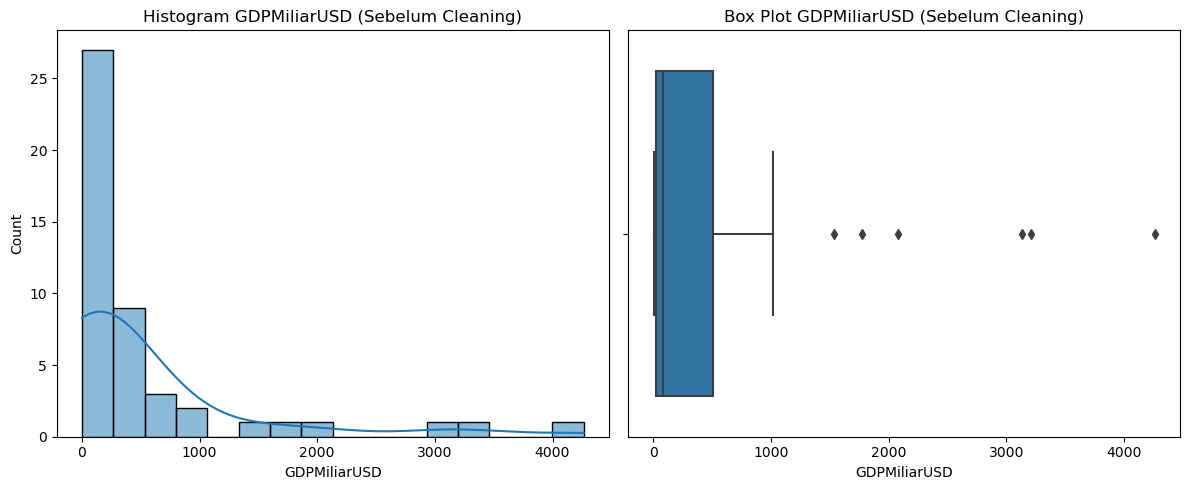

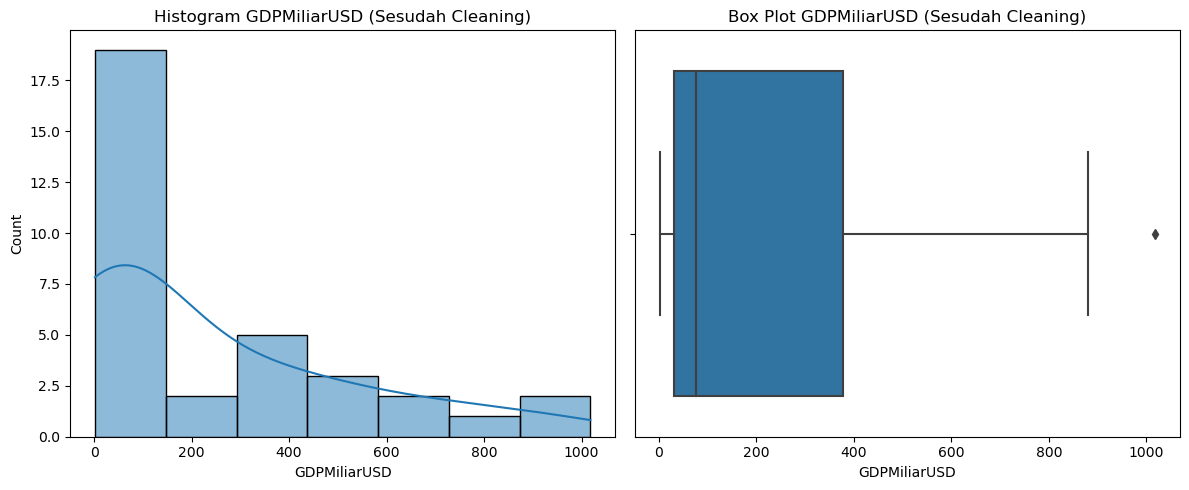

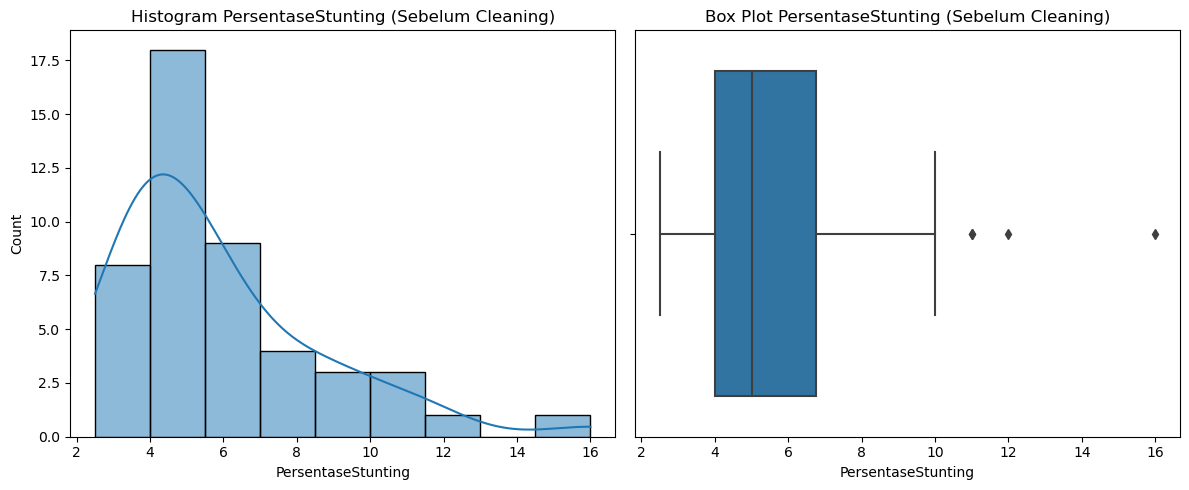

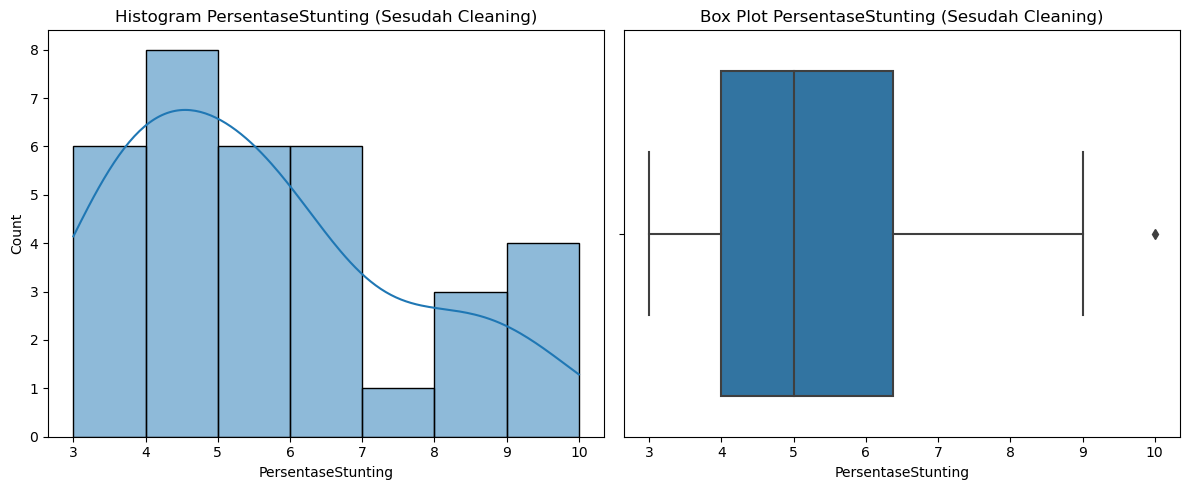

In [32]:
# --- Visualisasi Histogram dan Box Plot sebelum dan sesudah cleaning ---
for col in num_cols:
    # Sebelum cleaning
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df_original[col], kde=True)
    plt.title(f'Histogram {col} (Sebelum Cleaning)')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_original[col])
    plt.title(f'Box Plot {col} (Sebelum Cleaning)')
    plt.tight_layout()
    plt.show()
    
    # Sesudah cleaning
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Histogram {col} (Sesudah Cleaning)')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Box Plot {col} (Sesudah Cleaning)')
    plt.tight_layout()
    plt.show()

In [33]:
df = pd.read_csv("NegaraEropa_IQ_Pisa_GDP_PendapatanPerKapita_CLEANED.csv")
df

,NamaNegara,SkorIQ,SkorPISA,PendapatanperKapitaUSD,GDPMiliarUSD,PersentaseStunting
0,Andorra,102,460,46000,3.2,4.0
1,Armenia,95,410,5000,13.0,9.0
2,Austria,101,490,54000,516.5,5.0
3,Belarus,95,460,6600,72.6,5.5
4,Belgium,99,470,49000,642.3,4.5
5,Bosnia & Herzegovina,93,390,10500,20.6,9.0
6,Bulgaria,95,420,11800,80.4,8.0
7,Croatia,97,430,14200,62.6,6.5
8,Cyprus,98,450,29000,30.1,5.0
9,Czech Republic,98,460,19000,314.3,4.0


In [34]:
# --- Simpan dataset yang sudah dibersihkan ke file CSV ---
cleaned_file_name = "NegaraEropa_IQ_Pisa_GDP_PendapatanPerKapita_CLEANED.csv"
df_cleaned.to_csv(cleaned_file_name, index=False)
print(f"Dataset cleaned telah disimpan sebagai {cleaned_file_name}")

Dataset cleaned telah disimpan sebagai NegaraEropa_IQ_Pisa_GDP_PendapatanPerKapita_CLEANED.csv


In [35]:
# --- Hitung metrik terukur ---
avg_gdp = df_cleaned['GDPMiliarUSD'].mean()
avg_iq = df_cleaned['SkorIQ'].mean()
avg_income = df_cleaned['PendapatanperKapitaUSD'].mean()

max_gdp = df_cleaned['GDPMiliarUSD'].max()
max_gdp_country = df_cleaned.loc[df_cleaned['GDPMiliarUSD'].idxmax(), 'NamaNegara']

max_iq = df_cleaned['SkorIQ'].max()
max_iq_country = df_cleaned.loc[df_cleaned['SkorIQ'].idxmax(), 'NamaNegara']

max_income = df_cleaned['PendapatanperKapitaUSD'].max()
max_income_country = df_cleaned.loc[df_cleaned['PendapatanperKapitaUSD'].idxmax(), 'NamaNegara']

print("Average GDP:", avg_gdp)
print("Average IQ Score:", avg_iq)
print("Average Capita Income:", avg_income)
print("Highest GDP:", max_gdp, "dari", max_gdp_country)
print("Highest IQ Score:", max_iq, "dari", max_iq_country)
print("Highest Capita Income:", max_income, "dari", max_income_country)

Average GDP: 244.86764705882354
Average IQ Score: 98.17647058823529
Average Capita Income: 33629.41176470588
Highest GDP: 1018.1 dari Netherlands
Highest IQ Score: 104 dari Norway
Highest Capita Income: 85000 dari Norway


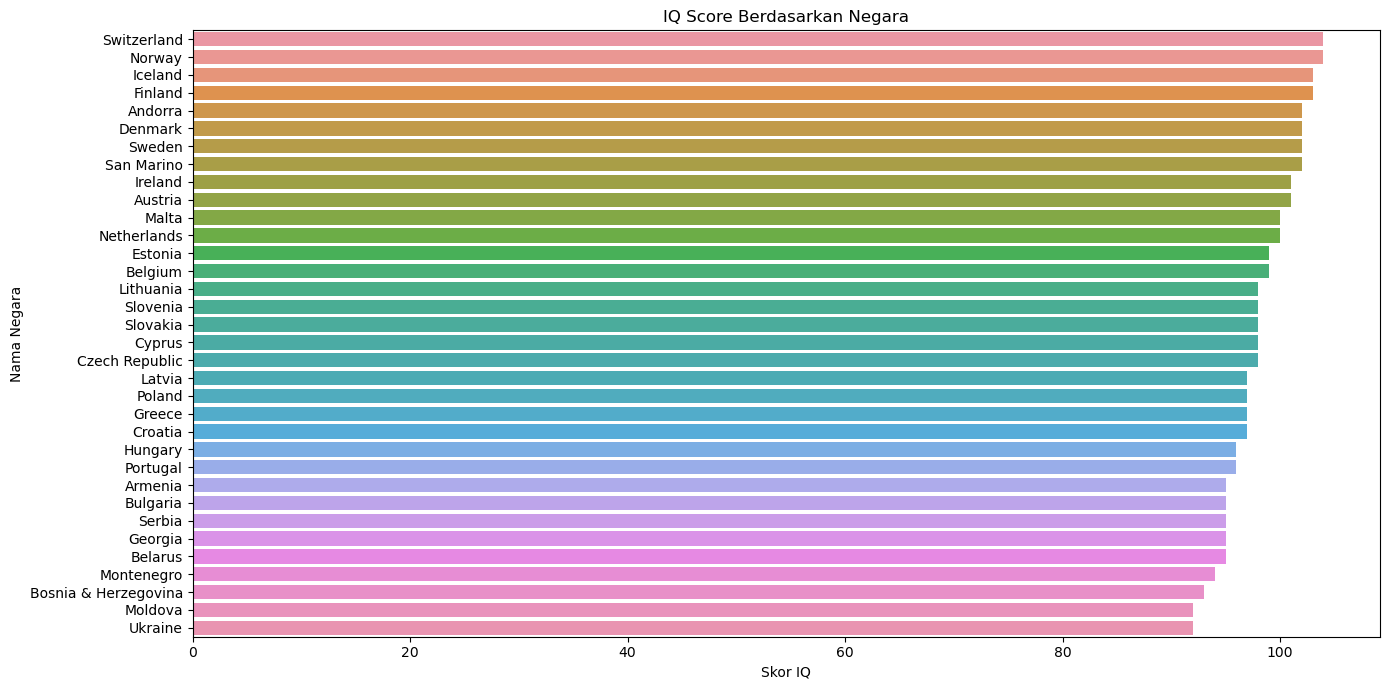

In [36]:
# --- Bar Chart IQ Score per Country ---
plt.figure(figsize=(14, 7))
sns.barplot(x='SkorIQ', y='NamaNegara', data=df_cleaned.sort_values('SkorIQ', ascending=False))
plt.title("IQ Score Berdasarkan Negara")
plt.xlabel("Skor IQ")
plt.ylabel("Nama Negara")
plt.tight_layout()
plt.show()

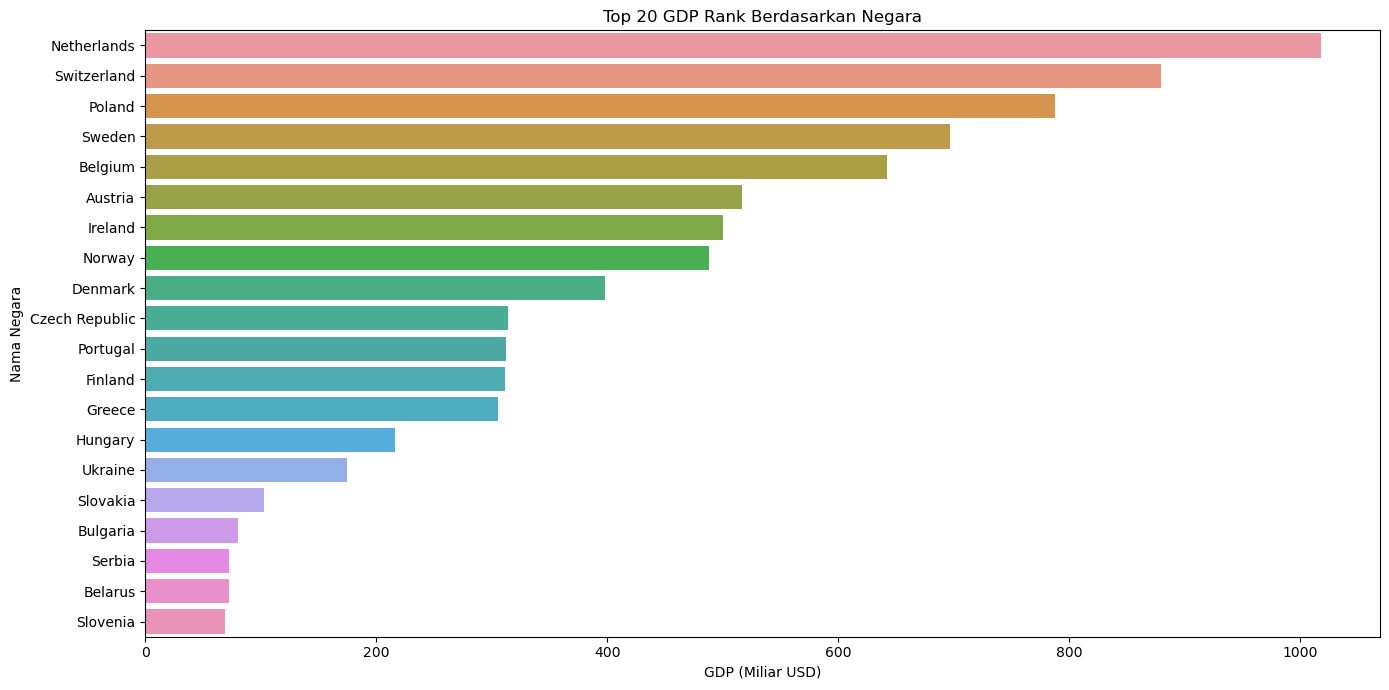

In [37]:
# --- Horizontal Bar Chart Top 20 GDP Rank by Country ---
df_top20_gdp = df_cleaned.sort_values(by='GDPMiliarUSD', ascending=False).head(20)
plt.figure(figsize=(14, 7))
sns.barplot(x='GDPMiliarUSD', y='NamaNegara', data=df_top20_gdp, orient='h')
plt.title("Top 20 GDP Rank Berdasarkan Negara")
plt.xlabel("GDP (Miliar USD)")
plt.ylabel("Nama Negara")
plt.tight_layout()
plt.show()

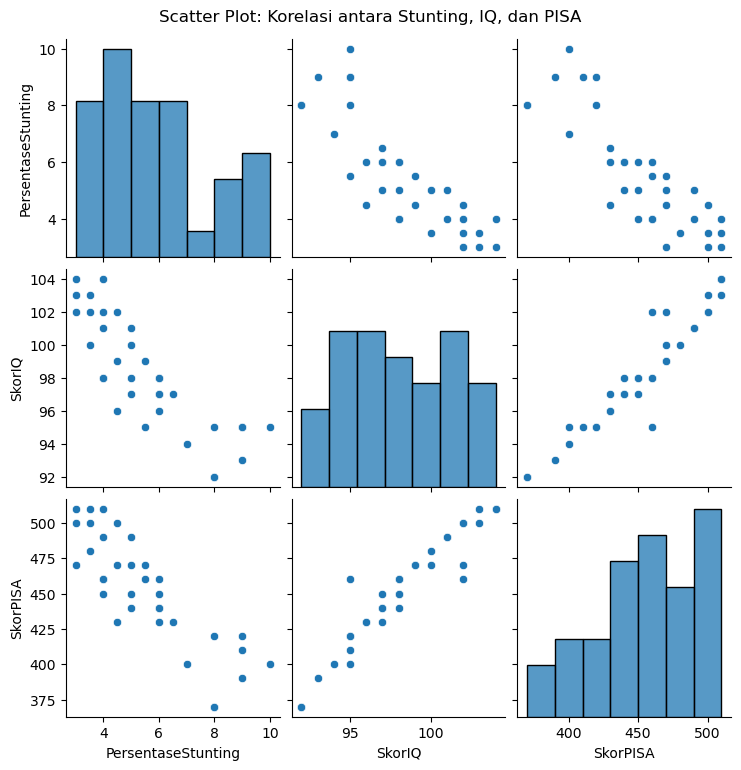

In [38]:
# --- Scatter Plot: Korelasi antara Stunting, IQ, dan PISA ---
sns.pairplot(df_cleaned[['PersentaseStunting', 'SkorIQ', 'SkorPISA']])
plt.suptitle("Scatter Plot: Korelasi antara Stunting, IQ, dan PISA", y=1.02)
plt.show()

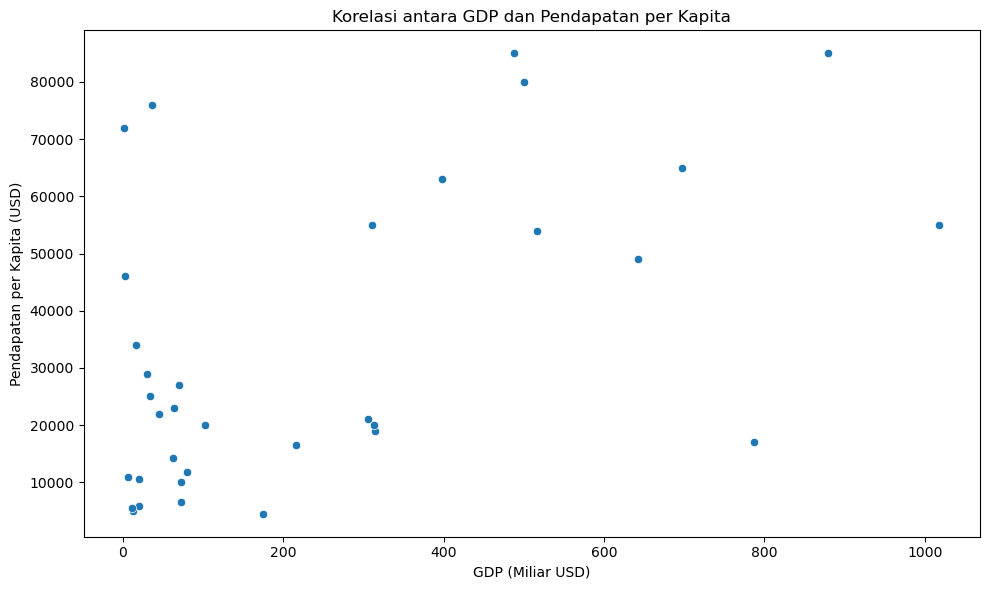

In [39]:
# --- Scatter Plot: Korelasi antara GDP dan Pendapatan per Kapita ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDPMiliarUSD', y='PendapatanperKapitaUSD', data=df_cleaned)
plt.title("Korelasi antara GDP dan Pendapatan per Kapita")
plt.xlabel("GDP (Miliar USD)")
plt.ylabel("Pendapatan per Kapita (USD)")
plt.tight_layout()
plt.show()

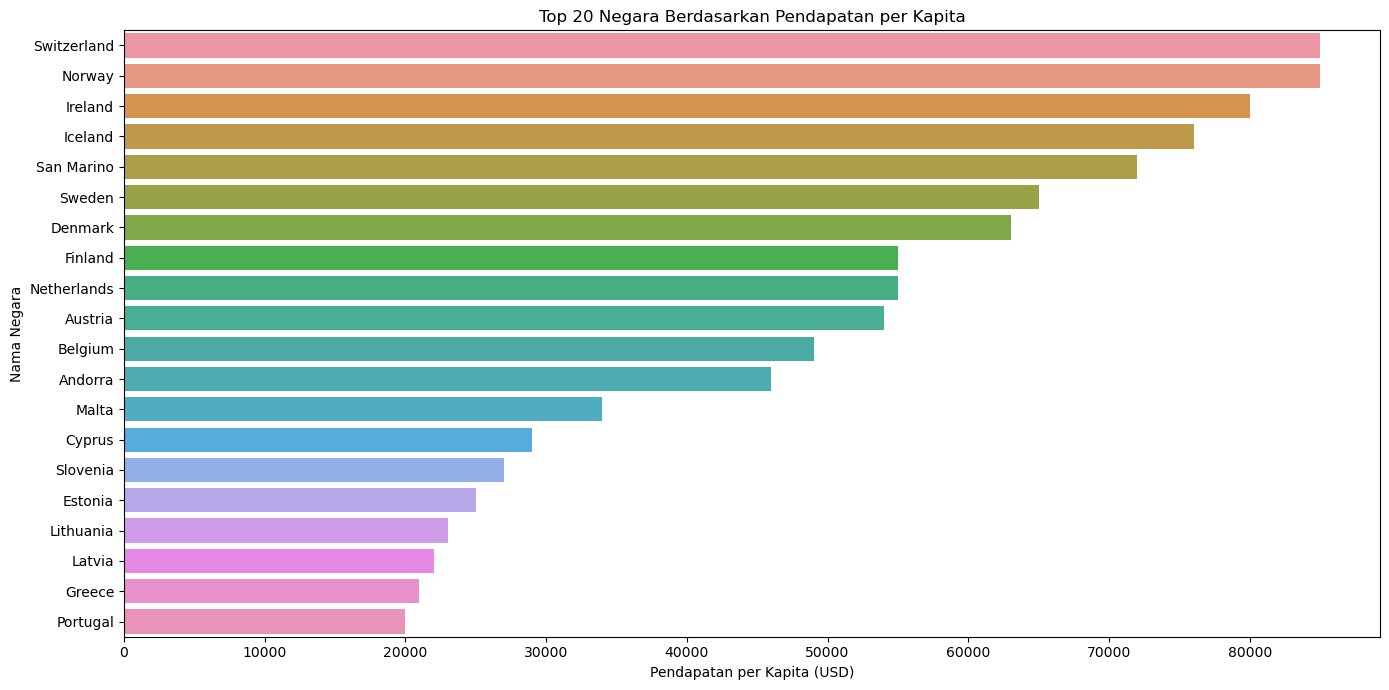

In [40]:
# --- Bar Chart Top 20 Negara berdasarkan Pendapatan per Kapita ---
df_top20_income = df_cleaned.sort_values(by='PendapatanperKapitaUSD', ascending=False).head(20)
plt.figure(figsize=(14, 7))
sns.barplot(x='PendapatanperKapitaUSD', y='NamaNegara', data=df_top20_income)
plt.title("Top 20 Negara Berdasarkan Pendapatan per Kapita")
plt.xlabel("Pendapatan per Kapita (USD)")
plt.ylabel("Nama Negara")
plt.tight_layout()
plt.show()

In [41]:
# --- Contoh Filter Interaktif Berdasarkan Negara (menggunakan ipywidgets) ---
from ipywidgets import interact
def filter_by_country(country):
    display(df_cleaned[df_cleaned['NamaNegara'] == country])

interact(filter_by_country, country=sorted(df_cleaned['NamaNegara'].unique()))

interactive(children=(Dropdown(description='country', options=('Andorra', 'Armenia', 'Austria', 'Belarus', 'Be…

<function __main__.filter_by_country(country)>

In [42]:
# import streamlit as st
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# st.set_page_config(layout="wide")
# st.title("Dashboard Analisis Data Negara Eropa")

# # --- Muat dataset hasil cleaning ---
# df = pd.read_csv("NegaraEropa_IQ_Pisa_GDP_PendapatanPerKapita_CLEANED.csv")

# # --- Sidebar Filter ---
# st.sidebar.header("Filter")
# selected_country = st.sidebar.selectbox("Pilih Negara", options=sorted(df["NamaNegara"].unique()))
# df_filtered = df[df["NamaNegara"] == selected_country]

# # --- Tampilkan Metrik Utama ---
# st.header("Metrik Utama")
# col1, col2, col3 = st.columns(3)
# with col1:
#     st.metric("Average GDP", f"{df['GDP'].mean():.2f}")
# with col2:
#     st.metric("Average IQ Score", f"{df['SkorIQ'].mean():.2f}")
# with col3:
#     st.metric("Average Capita Income", f"{df['PendapatanperKapitaUSD'].mean():.2f}")

# col4, col5, col6 = st.columns(3)
# with col4:
#     st.metric("Highest GDP", f"{df.loc[df['GDP'].idxmax(), 'GDP']:.2f}",
#               f"({df.loc[df['GDP'].idxmax(), 'NamaNegara']})")
# with col5:
#     st.metric("Highest IQ Score", f"{df.loc[df['SkorIQ'].idxmax(), 'SkorIQ']}",
#               f"({df.loc[df['SkorIQ'].idxmax(), 'NamaNegara']})")
# with col6:
#     st.metric("Highest Capita Income", f"{df.loc[df['PendapatanperKapitaUSD'].idxmax(), 'PendapatanperKapitaUSD']}",
#               f"({df.loc[df['PendapatanperKapitaUSD'].idxmax(), 'NamaNegara']})")

# # --- Chart IQ Score per Negara ---
# st.subheader("IQ Score Berdasarkan Negara")
# fig1, ax1 = plt.subplots(figsize=(10, 6))
# sns.barplot(x="SkorIQ", y="NamaNegara", data=df.sort_values("SkorIQ", ascending=False), ax=ax1)
# ax1.set_title("IQ Score per Negara")
# st.pyplot(fig1)

# # --- Scatter Plot: GDP vs Pendapatan per Kapita ---
# st.subheader("GDP vs Pendapatan per Kapita")
# fig2, ax2 = plt.subplots(figsize=(10, 6))
# sns.scatterplot(x="GDP", y="PendapatanperKapitaUSD", data=df, ax=ax2)
# ax2.set_title("Korelasi antara GDP dan Pendapatan per Kapita")
# st.pyplot(fig2)

# # --- Tampilkan Data Filtered ---
# st.subheader(f"Data untuk {selected_country}")
# st.dataframe(df_filtered)
